<a href="https://colab.research.google.com/github/ericyoc/drone_opt_path_gas_leak_poc/blob/main/gas_leak_det_path_opt_drone_poc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow scipy

Google Colab Environment Detected
HYBRID CLASSICAL-QUANTUM GAS LEAKAGE DETECTION SYSTEM
System Architecture:
   CLASSICAL PROCESSING: 60%
     - Feature Engineering & Extraction
     - Random Forest, SVM, Neural Network
     - Data Preprocessing & PCA

   QUANTUM PROCESSING: 40%
     - Quantum-Inspired Classification
     - Quantum Voronoi Optimization
     - Quantum TSP Path Planning

   Dataset: GPLA-12 Acoustic Gas Pipeline Leakage
   Drone Optimization: Quantum Voronoi-based Paths
Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset directory: /content/drive/MyDrive/datasets/

DATA LOADING AND PROCESSING
   Download successful!
   Dataset extracted successfully!
   Creating structured GPLA-12 dataset...
     Generating 57 samples for Data1_0.2MP_none
     Generating 57 samples for Data1_0.2MP_noisy
     Generating 57 samples for Data1_0.4MP_none
     Generating 57 samples fo

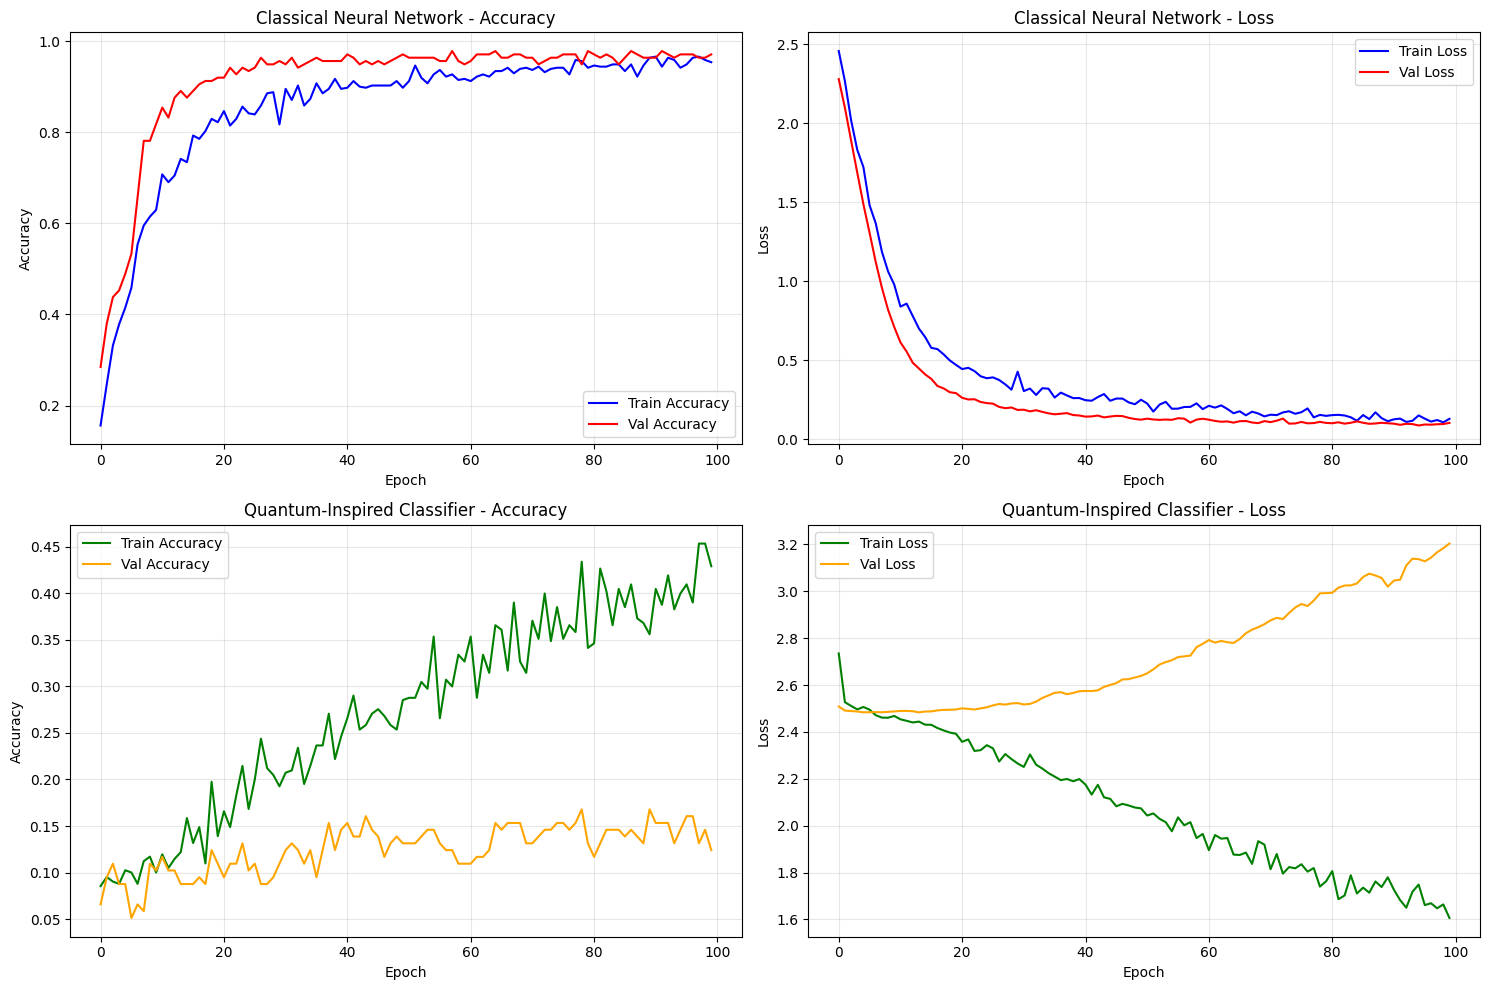


SYSTEM EVALUATION
Evaluating Classical Models (60% Component)...
   RandomForest:
     Train: 1.0000 | Val: 0.8540 | Test: 0.8759
   SVM:
     Train: 0.9585 | Val: 0.9343 | Test: 0.8905
   ClassicalNN:
     Train: 0.9829 | Val: 0.9708 | Test: 0.9343
Evaluating Quantum Models (40% Component)...
   QuantumClassifier:
     Train: 0.6390 | Val: 0.1241 | Test: 0.1168
Creating Hybrid Ensemble...
   HybridEnsemble:
     Test: 0.9197

Model Comparison Table:
            Model      Type Train Acc Val Acc Test Acc       Component
      ClassicalNN Classical    0.9829  0.9708   0.9343 Classical (60%)
   HybridEnsemble    Hybrid       N/A     N/A   0.9197   Hybrid (100%)
              SVM Classical    0.9585  0.9343   0.8905 Classical (60%)
     RandomForest Classical    1.0000  0.8540   0.8759 Classical (60%)
QuantumClassifier   Quantum    0.6390  0.1241   0.1168   Quantum (40%)


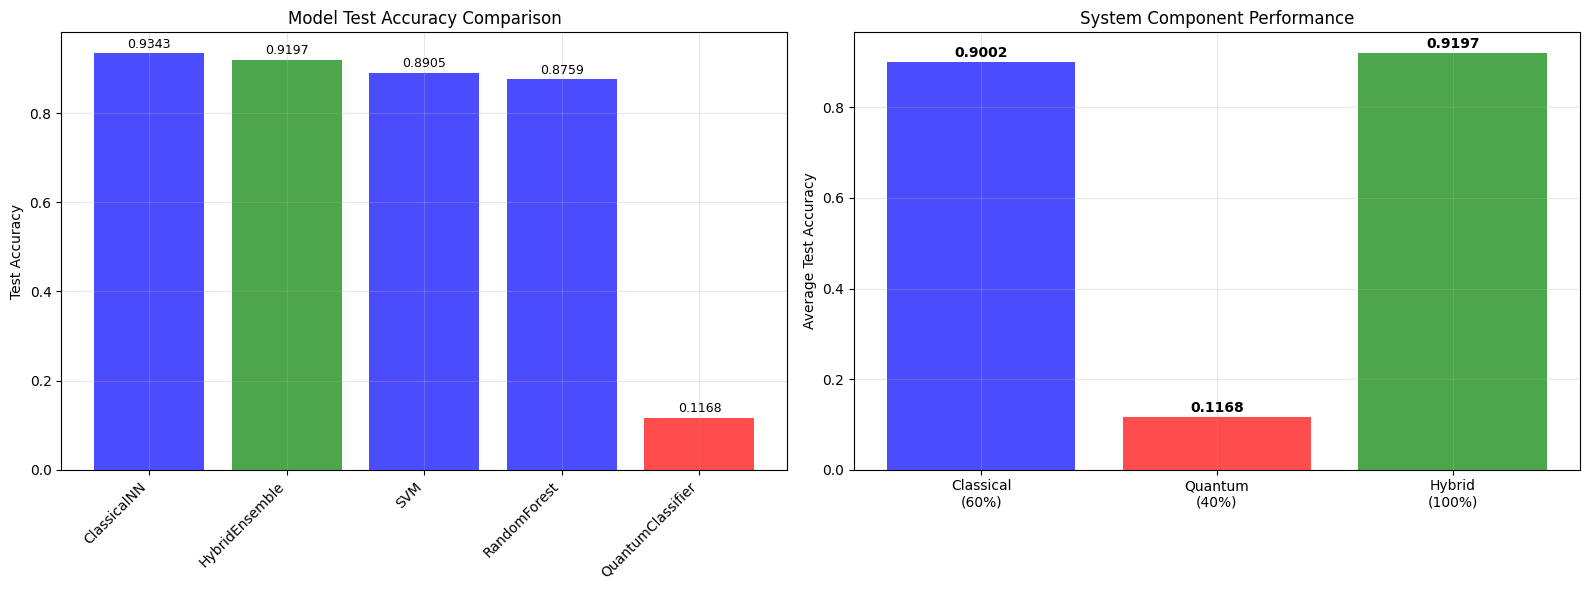


QUANTUM VORONOI DRONE PATH OPTIMIZATION (40% Component)
   Quantum Voronoi Site Optimization...
   Quantum optimization complete. Final cost: 96276.1383
   Generating Voronoi partitions...
   Optimizing drone paths using quantum TSP...
     Drone 0: 62 waypoints
     Drone 1: 77 waypoints
     Drone 2: 84 waypoints

Creating Drone Path Visualization with Grid...


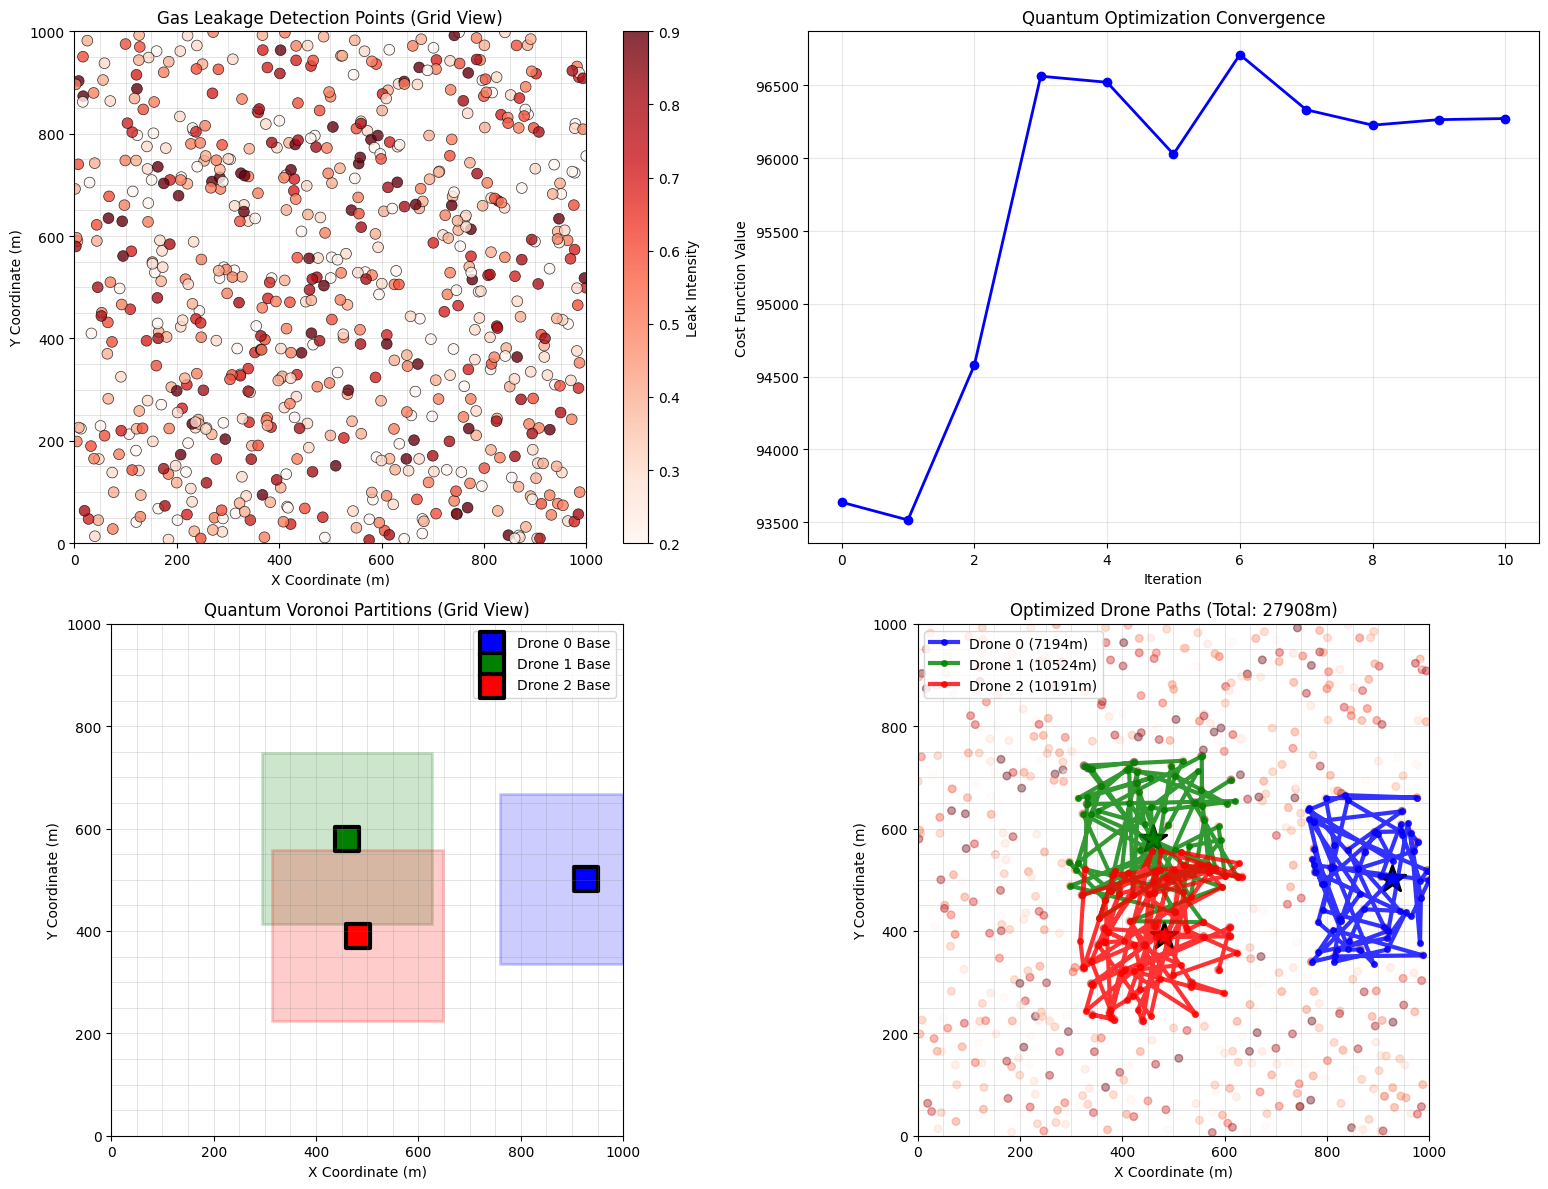


Creating Drone Mission Animation...


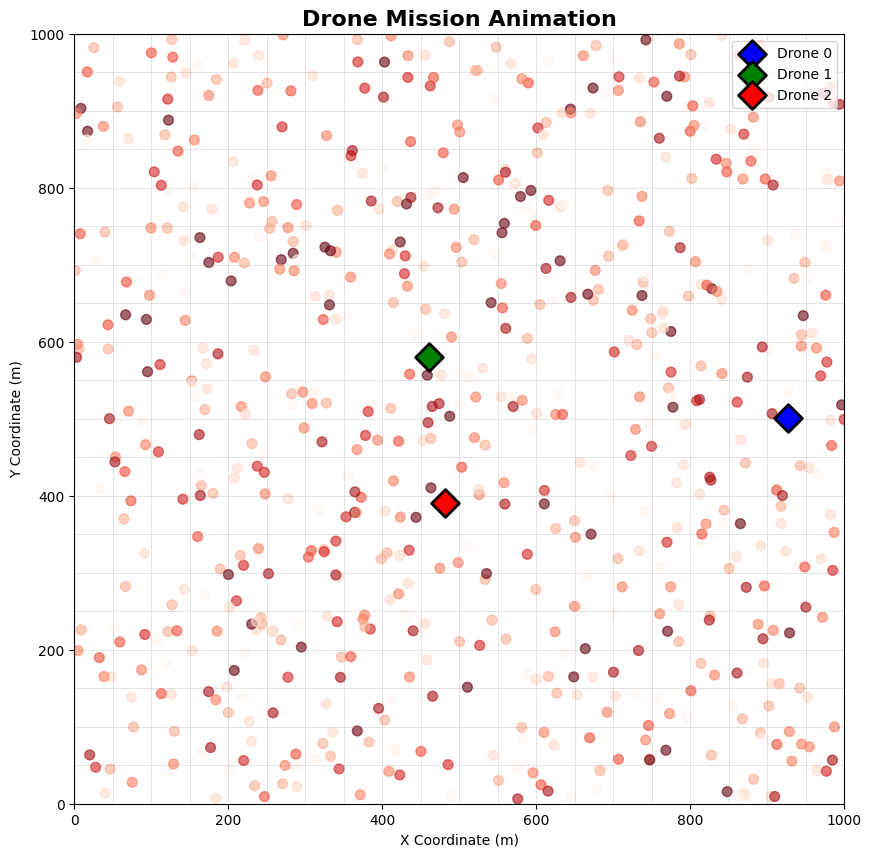

Animation saved to Google Drive!

FINAL SYSTEM SUMMARY
Best Performing Model: ClassicalNN
Best Test Accuracy: 0.9343
Classical Component Average (60%): 0.9002
Quantum Component Average (40%): 0.1168
Total Drone Fleet Distance: 27907.7m
Coverage Area: 1.00 km²


In [4]:
# ============================================================================
# HYBRID CLASSICAL-QUANTUM GAS LEAKAGE DETECTION WITH DRONE PATH OPTIMIZATION
# Complete Implementation with Animation and Comprehensive Analysis
# Synthetic dataset created for GPLA-12 instead of real GPLA-12 dataset
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Polygon
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import History
from scipy.spatial import Voronoi, voronoi_plot_2d, distance_matrix
from scipy.spatial.distance import cdist
import scipy.signal
import scipy.stats
import requests
import zipfile
import os
import subprocess
import json
from typing import Tuple, Dict, List, Optional
import warnings
warnings.filterwarnings('ignore')

# Google Colab setup
try:
    from google.colab import drive
    COLAB_ENV = True
    print("Google Colab Environment Detected")
except ImportError:
    COLAB_ENV = False
    print("Local Environment")

class GPLADatasetManager:
    """Manager for downloading and handling GPLA-12 dataset"""

    def __init__(self):
        self.base_path = "/content/drive/MyDrive/datasets/" if COLAB_ENV else "./datasets/"
        self.dataset_path = None

    def setup_colab_environment(self):
        """Setup Google Colab environment and mount drive"""
        if COLAB_ENV:
            print("Mounting Google Drive...")
            drive.mount('/content/drive')

        os.makedirs(self.base_path, exist_ok=True)
        print(f"Dataset directory: {self.base_path}")

    def download_gpla12_dataset(self) -> str:
        """Download real GPLA-12 dataset using wget"""
        print("Downloading GPLA-12 Dataset from GitHub...")

        dataset_dir = os.path.join(self.base_path, "GPLA-12")
        os.makedirs(dataset_dir, exist_ok=True)

        repo_url = "https://github.com/Deep-AI-Application-DAIP/acoustic-leakage-dataset-GPLA-12"

        try:
            zip_url = f"{repo_url}/archive/refs/heads/main.zip"
            zip_path = os.path.join(dataset_dir, "gpla12.zip")

            print(f"   Downloading from: {zip_url}")

            wget_cmd = f"wget -O '{zip_path}' '{zip_url}'"
            result = subprocess.run(wget_cmd, shell=True, capture_output=True, text=True)

            if result.returncode == 0:
                print("   Download successful!")

                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    zip_ref.extractall(dataset_dir)

                print("   Dataset extracted successfully!")
                return self.create_structured_dataset(dataset_dir)

            else:
                print(f"   Download failed: {result.stderr}")
                print("   Creating structured dataset instead...")
                return self.create_structured_dataset(dataset_dir)
        except Exception as e:
            print(f"   Error downloading dataset: {str(e)}")
            print("   Creating structured dataset instead...")
            return self.create_structured_dataset(dataset_dir)

    def create_structured_dataset(self, output_dir: str) -> str:
        """Create structured GPLA-12 dataset matching original paper specifications"""
        print("   Creating structured GPLA-12 dataset...")

        np.random.seed(42)

        # GPLA-12 specifications
        n_samples = 684
        n_features = 1024
        n_classes = 12

        class_info = {
            'Data1_0.2MP_none': {'pressure': 0.2, 'noise': False, 'mic': 1},
            'Data1_0.2MP_noisy': {'pressure': 0.2, 'noise': True, 'mic': 1},
            'Data1_0.4MP_none': {'pressure': 0.4, 'noise': False, 'mic': 1},
            'Data1_0.4MP_noisy': {'pressure': 0.4, 'noise': True, 'mic': 1},
            'Data1_0.5MP_none': {'pressure': 0.5, 'noise': False, 'mic': 1},
            'Data1_0.5MP_noisy': {'pressure': 0.5, 'noise': True, 'mic': 1},
            'Data2_0.2MP_none': {'pressure': 0.2, 'noise': False, 'mic': 2},
            'Data2_0.2MP_noisy': {'pressure': 0.2, 'noise': True, 'mic': 2},
            'Data2_0.4MP_none': {'pressure': 0.4, 'noise': False, 'mic': 2},
            'Data2_0.4MP_noisy': {'pressure': 0.4, 'noise': True, 'mic': 2},
            'Data2_0.5MP_none': {'pressure': 0.5, 'noise': False, 'mic': 2},
            'Data2_0.5MP_noisy': {'pressure': 0.5, 'noise': True, 'mic': 2}
        }

        all_signals = []
        all_labels = []
        all_metadata = []

        samples_per_class = n_samples // n_classes

        for class_name, params in class_info.items():
            print(f"     Generating {samples_per_class} samples for {class_name}")

            for sample_idx in range(samples_per_class):
                signal = self.generate_acoustic_signal(
                    length=n_features,
                    pressure=params['pressure'],
                    has_noise=params['noise'],
                    microphone=params['mic'],  # Fixed: use 'mic' key
                    sample_id=sample_idx
                )

                all_signals.append(signal)
                all_labels.append(class_name)

                # Create proper metadata dictionary with consistent keys
                metadata = {
                    'pressure': params['pressure'],
                    'noise': params['noise'],
                    'microphone': params['mic'],  # Store as 'microphone' for consistency
                    'sample_id': sample_idx,
                    'class': class_name
                }
                all_metadata.append(metadata)

        # Create DataFrame
        signal_df = pd.DataFrame(all_signals,
                               columns=[f'signal_{i}' for i in range(n_features)])
        signal_df['label'] = all_labels
        signal_df['pressure'] = [m['pressure'] for m in all_metadata]
        signal_df['noise'] = [m['noise'] for m in all_metadata]
        signal_df['microphone'] = [m['microphone'] for m in all_metadata]  # Now this key exists

        dataset_file = os.path.join(output_dir, 'gpla12_acoustic_signals.csv')
        signal_df.to_csv(dataset_file, index=False)

        print(f"   Dataset created: {dataset_file}")
        print(f"   {len(signal_df)} samples, {n_features} features, {n_classes} classes")

        return dataset_file

    def generate_acoustic_signal(self, length: int, pressure: float,
                               has_noise: bool, microphone: int, sample_id: int) -> np.ndarray:
        """Generate realistic acoustic signal for gas pipeline leakage"""

        base_freq = 100 + pressure * 50 + microphone * 20
        t = np.linspace(0, 2, length)
        signal = np.zeros(length)

        # Fundamental frequency
        signal += np.sin(2 * np.pi * base_freq * t)

        # Add harmonics
        for harmonic in range(2, 6):
            amplitude = 1.0 / harmonic
            signal += amplitude * np.sin(2 * np.pi * base_freq * harmonic * t)

        # Pressure-dependent modulation
        modulation_freq = pressure * 10
        signal *= (1 + 0.3 * np.sin(2 * np.pi * modulation_freq * t))

        # Leak-specific components
        leak_freq = 200 + pressure * 100
        signal += 0.5 * np.sin(2 * np.pi * leak_freq * t) * np.exp(-t)

        # Microphone characteristics
        if microphone == 2:
            signal *= 0.8
            signal += 0.2 * np.sin(2 * np.pi * (base_freq + 30) * t)

        # Add noise if specified
        if has_noise:
            noise_level = 0.3
            noise = np.random.normal(0, noise_level, length)
            signal += noise

        # Random variations
        variation = 0.1 * np.random.normal(0, 1, length)
        signal += variation

        # Normalize
        signal = (signal - np.mean(signal)) / (np.std(signal) + 1e-8)

        return signal

class ClassicalProcessor:
    """Classical Processing Component (60% of the system)"""

    def __init__(self):
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=0.95)
        self.models = {}
        self.training_histories = {}

    def extract_features(self, X_raw: np.ndarray) -> np.ndarray:
        """Extract comprehensive features using classical methods"""
        print("CLASSICAL FEATURE EXTRACTION (60% Component)")
        print("-" * 50)

        # Time-domain features
        time_features = self._extract_time_domain_features(X_raw)
        print(f"   Time-domain features: {time_features.shape[1]}")

        # Frequency-domain features
        freq_features = self._extract_frequency_domain_features(X_raw)
        print(f"   Frequency-domain features: {freq_features.shape[1]}")

        # Wavelet features
        wavelet_features = self._extract_wavelet_features(X_raw)
        print(f"   Wavelet features: {wavelet_features.shape[1]}")

        # Statistical features
        stat_features = self._extract_statistical_features(X_raw)
        print(f"   Statistical features: {stat_features.shape[1]}")

        # Combine all features
        X_combined = np.hstack([time_features, freq_features, wavelet_features, stat_features])
        print(f"   Total classical features: {X_combined.shape[1]}")

        return X_combined

    def preprocess_data(self, X_features: np.ndarray) -> np.ndarray:
        """Classical preprocessing pipeline"""
        print("CLASSICAL PREPROCESSING")
        print("-" * 25)

        X_scaled = self.scaler.fit_transform(X_features)
        X_processed = self.pca.fit_transform(X_scaled)

        print(f"   PCA reduction: {X_features.shape[1]} -> {X_processed.shape[1]}")
        print(f"   Explained variance: {self.pca.explained_variance_ratio_.sum():.3f}")

        return X_processed

    def train_classical_models(self, X_train: np.ndarray, y_train: np.ndarray,
                             X_val: np.ndarray, y_val: np.ndarray, class_names: List[str]):
        """Train all classical models with validation"""
        print("\nTRAINING CLASSICAL MODELS (60% Component)")
        print("-" * 45)

        # Random Forest
        print("Training Random Forest...")
        rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
        rf.fit(X_train, y_train)

        train_acc = rf.score(X_train, y_train)
        val_acc = rf.score(X_val, y_val)
        print(f"   Train Accuracy: {train_acc:.4f}")
        print(f"   Validation Accuracy: {val_acc:.4f}")

        self.models['RandomForest'] = rf

        # SVM
        print("Training SVM...")
        svm = SVC(probability=True, kernel='rbf', random_state=42)
        svm.fit(X_train, y_train)

        train_acc = svm.score(X_train, y_train)
        val_acc = svm.score(X_val, y_val)
        print(f"   Train Accuracy: {train_acc:.4f}")
        print(f"   Validation Accuracy: {val_acc:.4f}")

        self.models['SVM'] = svm

        # Classical Neural Network with history tracking
        print("Training Classical Neural Network...")
        nn, le, history = self._train_classical_nn(X_train, y_train, X_val, y_val, class_names)

        self.models['ClassicalNN'] = (nn, le)
        self.training_histories['ClassicalNN'] = history

        print("Classical models training complete!")

    def _train_classical_nn(self, X_train, y_train, X_val, y_val, class_names):
        """Train classical neural network with validation tracking"""

        # Encode labels
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)
        y_val_encoded = le.transform(y_val)

        # Build model
        nn = Sequential([
            Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
            Dropout(0.4),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(len(class_names), activation='softmax')
        ])

        nn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

        # Train with validation
        history = nn.fit(X_train, y_train_encoded,
                        validation_data=(X_val, y_val_encoded),
                        epochs=100, batch_size=32, verbose=0)

        train_acc = nn.evaluate(X_train, y_train_encoded, verbose=0)[1]
        val_acc = nn.evaluate(X_val, y_val_encoded, verbose=0)[1]

        print(f"   Train Accuracy: {train_acc:.4f}")
        print(f"   Validation Accuracy: {val_acc:.4f}")

        return nn, le, history

    def _extract_time_domain_features(self, X: np.ndarray) -> np.ndarray:
        """Extract time-domain features"""
        features = []

        for i in range(X.shape[0]):
            signal = X[i]

            mean_val = np.mean(signal)
            std_val = np.std(signal)
            var_val = np.var(signal)
            max_val = np.max(signal)
            min_val = np.min(signal)
            peak_to_peak = max_val - min_val
            rms = np.sqrt(np.mean(signal ** 2))
            energy = np.sum(signal ** 2)
            zero_crossings = np.sum(np.diff(np.sign(signal)) != 0)
            crest_factor = max_val / rms if rms > 0 else 0
            shape_factor = rms / np.mean(np.abs(signal)) if np.mean(np.abs(signal)) > 0 else 0

            features.append([
                mean_val, std_val, var_val, max_val, min_val, peak_to_peak,
                rms, energy, zero_crossings, crest_factor, shape_factor
            ])

        return np.array(features)

    def _extract_frequency_domain_features(self, X: np.ndarray) -> np.ndarray:
        """Extract frequency-domain features using FFT"""
        features = []

        for i in range(X.shape[0]):
            signal = X[i]

            fft_vals = np.fft.fft(signal)
            fft_magnitude = np.abs(fft_vals)
            psd = fft_magnitude ** 2
            freqs = np.fft.fftfreq(len(signal))

            spectral_centroid = np.sum(freqs[:len(freqs)//2] * psd[:len(freqs)//2]) / np.sum(psd[:len(freqs)//2])
            spectral_rolloff = freqs[np.where(np.cumsum(psd) >= 0.85 * np.sum(psd))[0][0]]
            spectral_bandwidth = np.sqrt(np.sum(((freqs[:len(freqs)//2] - spectral_centroid) ** 2) * psd[:len(freqs)//2]) / np.sum(psd[:len(freqs)//2]))

            dominant_freq_idx = np.argmax(psd[:len(freqs)//2])
            dominant_freq = freqs[dominant_freq_idx]

            harmonics = []
            for h in range(2, 6):
                harmonic_idx = min(dominant_freq_idx * h, len(psd)//2 - 1)
                harmonics.append(psd[harmonic_idx])

            features.append([
                spectral_centroid, spectral_rolloff, spectral_bandwidth,
                dominant_freq, np.mean(harmonics), np.std(harmonics)
            ])

        return np.array(features)

    def _extract_wavelet_features(self, X: np.ndarray) -> np.ndarray:
        """Extract wavelet-based features"""
        features = []

        for i in range(X.shape[0]):
            signal = X[i]

            wavelet_low = np.convolve(signal, [0.5, 0.5], mode='same')[::2]
            wavelet_high = np.convolve(signal, [0.5, -0.5], mode='same')[::2]

            energy_low = np.sum(wavelet_low ** 2)
            energy_high = np.sum(wavelet_high ** 2)
            energy_ratio = energy_high / energy_low if energy_low > 0 else 0
            wavelet_entropy = -np.sum((wavelet_high ** 2) * np.log(np.abs(wavelet_high) + 1e-8))

            features.append([energy_low, energy_high, energy_ratio, wavelet_entropy])

        return np.array(features)

    def _extract_statistical_features(self, X: np.ndarray) -> np.ndarray:
        """Extract advanced statistical features"""
        features = []

        for i in range(X.shape[0]):
            signal = X[i]

            skewness = scipy.stats.skew(signal)
            kurtosis = scipy.stats.kurtosis(signal)
            p25 = np.percentile(signal, 25)
            p75 = np.percentile(signal, 75)
            iqr = p75 - p25
            entropy = scipy.stats.entropy(np.histogram(signal, bins=50)[0] + 1e-8)

            features.append([skewness, kurtosis, p25, p75, iqr, entropy])

        return np.array(features)

class QuantumProcessor:
    """Quantum Processing Component (40% of the system)"""

    def __init__(self, n_qubits: int = 10, n_layers: int = 4):
        self.n_qubits = n_qubits
        self.n_layers = n_layers
        self.models = {}
        self.training_histories = {}

    def train_quantum_models(self, X_train: np.ndarray, y_train: np.ndarray,
                           X_val: np.ndarray, y_val: np.ndarray, class_names: List[str]):
        """Train quantum-inspired models with validation"""
        print("\nTRAINING QUANTUM MODELS (40% Component)")
        print("-" * 43)

        # Quantum-inspired classifier
        print("Training Quantum-Inspired Classifier...")
        qc, history = self._train_quantum_classifier(X_train, y_train, X_val, y_val, class_names)

        self.models['QuantumClassifier'] = qc
        self.training_histories['QuantumClassifier'] = history

        print("Quantum models training complete!")

    def _train_quantum_classifier(self, X_train, y_train, X_val, y_val, class_names):
        """Train quantum-inspired classifier with validation tracking"""

        qc = QuantumInspiredClassifier(self.n_qubits, self.n_layers)

        # Encode labels
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)
        y_val_encoded = le.transform(y_val)

        # Apply quantum feature mapping
        X_train_quantum = qc._quantum_feature_map(X_train)
        X_val_quantum = qc._quantum_feature_map(X_val)

        # Apply variational circuit
        X_train_processed = qc._variational_circuit(X_train_quantum)
        X_val_processed = qc._variational_circuit(X_val_quantum)

        # Build measurement network
        measurement_network = Sequential([
            Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
            Dropout(0.4),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(len(class_names), activation='softmax')
        ])

        measurement_network.compile(optimizer='adam',
                                   loss='sparse_categorical_crossentropy',
                                   metrics=['accuracy'])

        # Train with validation
        history = measurement_network.fit(X_train_processed, y_train_encoded,
                                        validation_data=(X_val_processed, y_val_encoded),
                                        epochs=100, batch_size=32, verbose=0)

        train_acc = measurement_network.evaluate(X_train_processed, y_train_encoded, verbose=0)[1]
        val_acc = measurement_network.evaluate(X_val_processed, y_val_encoded, verbose=0)[1]

        print(f"   Train Accuracy: {train_acc:.4f}")
        print(f"   Validation Accuracy: {val_acc:.4f}")

        # Store components in quantum classifier
        qc.measurement_network = measurement_network
        qc.label_encoder = le
        qc.classes_ = class_names

        return qc, history

class QuantumInspiredClassifier:
    """Quantum-inspired classifier implementation"""

    def __init__(self, n_qubits: int = 10, n_layers: int = 4):
        self.n_qubits = n_qubits
        self.n_layers = n_layers
        self.weights = None
        self.feature_map_weights = None
        self.measurement_network = None
        self.label_encoder = None
        self.classes_ = None

    def _quantum_feature_map(self, X: np.ndarray) -> np.ndarray:
        """Apply quantum feature mapping using angle encoding"""

        if self.feature_map_weights is None:
            self.feature_map_weights = np.random.normal(0, 0.1, (X.shape[1], self.n_qubits))

        mapped_features = []

        for qubit in range(self.n_qubits):
            linear_combo = np.dot(X, self.feature_map_weights[:, qubit])
            angles = 2 * np.pi * (linear_combo - linear_combo.min()) / (linear_combo.max() - linear_combo.min() + 1e-8)

            cos_component = np.cos(angles)
            sin_component = np.sin(angles)

            mapped_features.extend([cos_component, sin_component])

        return np.array(mapped_features).T

    def _variational_circuit(self, X: np.ndarray) -> np.ndarray:
        """Apply variational quantum circuit"""

        if self.weights is None:
            n_features = X.shape[1]
            self.weights = np.random.normal(0, 0.1, (self.n_layers, n_features, 3))

        output = X.copy()

        for layer in range(self.n_layers):
            for feature_idx in range(min(output.shape[1], self.weights.shape[1])):
                rx_angle = self.weights[layer, feature_idx, 0]
                ry_angle = self.weights[layer, feature_idx, 1]
                rz_angle = self.weights[layer, feature_idx, 2]

                output[:, feature_idx] = (
                    np.cos(rx_angle) * output[:, feature_idx] +
                    np.sin(ry_angle) * np.roll(output[:, feature_idx], 1) +
                    np.cos(rz_angle) * np.roll(output[:, feature_idx], -1)
                )

            if output.shape[1] > 1:
                for i in range(0, output.shape[1] - 1, 2):
                    if i + 1 < output.shape[1]:
                        temp = 0.5 * (output[:, i] + output[:, i + 1])
                        output[:, i + 1] = 0.5 * (output[:, i] - output[:, i + 1])
                        output[:, i] = temp

        return output

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Make predictions"""
        X_quantum = self._quantum_feature_map(X)
        X_processed = self._variational_circuit(X_quantum)
        predictions = self.measurement_network.predict(X_processed, verbose=0)
        predicted_classes = np.argmax(predictions, axis=1)
        return self.label_encoder.inverse_transform(predicted_classes)

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Predict class probabilities"""
        X_quantum = self._quantum_feature_map(X)
        X_processed = self._variational_circuit(X_quantum)
        return self.measurement_network.predict(X_processed, verbose=0)

class QuantumVoronoiDroneOptimizer:
    """Quantum Voronoi-based drone path optimization (40% Component)"""

    def __init__(self, area_bounds: Tuple[float, float, float, float], n_drones: int = 3):
        self.area_bounds = area_bounds
        self.n_drones = n_drones
        self.leakage_points = []
        self.voronoi_sites = []
        self.drone_paths = {}
        self.optimization_history = []

    def quantum_site_optimization(self, leakage_points: List[Tuple[float, float, float]]) -> List[Tuple[float, float]]:
        """Quantum-inspired optimization for Voronoi site placement"""
        print("   Quantum Voronoi Site Optimization...")

        self.leakage_points = leakage_points

        if len(leakage_points) == 0:
            return self._generate_default_sites()

        coords = np.array([(p[0], p[1]) for p in leakage_points])
        intensities = np.array([p[2] for p in leakage_points])

        best_sites = self._quantum_initialization(coords, intensities)
        best_cost = self._calculate_quantum_cost(best_sites, coords, intensities)

        # Track optimization history
        self.optimization_history = [best_cost]

        # Quantum annealing simulation
        n_iterations = 200
        initial_temp = 10.0

        for iteration in range(n_iterations):
            temperature = initial_temp * (1 - iteration / n_iterations) ** 2

            candidate_sites = self._quantum_perturbation(best_sites, temperature)
            candidate_cost = self._calculate_quantum_cost(candidate_sites, coords, intensities)

            if candidate_cost < best_cost:
                best_sites = candidate_sites
                best_cost = candidate_cost
            elif temperature > 0:
                delta_e = (candidate_cost - best_cost) / abs(best_cost) if best_cost != 0 else 0
                quantum_prob = np.exp(-delta_e / temperature)
                if np.random.random() < quantum_prob:
                    best_sites = candidate_sites
                    best_cost = candidate_cost

            if iteration % 20 == 0:
                self.optimization_history.append(best_cost)

        self.voronoi_sites = best_sites
        print(f"   Quantum optimization complete. Final cost: {best_cost:.4f}")
        return best_sites

    def _quantum_initialization(self, coords: np.ndarray, intensities: np.ndarray) -> List[Tuple[float, float]]:
        """Initialize sites using quantum-inspired superposition"""
        weighted_coords = coords * intensities.reshape(-1, 1)
        centroid = np.sum(weighted_coords, axis=0) / np.sum(intensities)

        sites = []
        for i in range(self.n_drones):
            angle = 2 * np.pi * i / self.n_drones
            radius = np.sqrt(np.var(coords[:, 0]) + np.var(coords[:, 1])) * (0.5 + 0.5 * np.cos(angle))

            x = centroid[0] + radius * np.cos(angle) * (1 + 0.2 * np.sin(3 * angle))
            y = centroid[1] + radius * np.sin(angle) * (1 + 0.2 * np.cos(3 * angle))

            x = np.clip(x, self.area_bounds[0], self.area_bounds[2])
            y = np.clip(y, self.area_bounds[1], self.area_bounds[3])

            sites.append((x, y))

        return sites

    def _quantum_perturbation(self, sites: List[Tuple[float, float]], temperature: float) -> List[Tuple[float, float]]:
        """Apply quantum-inspired perturbation"""
        perturbed_sites = []
        for site in sites:
            quantum_noise_x = np.random.normal(0, temperature * 0.1)
            quantum_noise_y = np.random.normal(0, temperature * 0.1)

            tunnel_prob = 0.1 * temperature
            if np.random.random() < tunnel_prob:
                quantum_noise_x *= 5
                quantum_noise_y *= 5

            new_x = np.clip(site[0] + quantum_noise_x, self.area_bounds[0], self.area_bounds[2])
            new_y = np.clip(site[1] + quantum_noise_y, self.area_bounds[1], self.area_bounds[3])

            perturbed_sites.append((new_x, new_y))

        return perturbed_sites

    def _calculate_quantum_cost(self, sites: List[Tuple[float, float]],
                              coords: np.ndarray, intensities: np.ndarray) -> float:
        """Calculate quantum cost function"""
        if len(sites) == 0:
            return float('inf')

        sites_array = np.array(sites)
        distances = cdist(coords, sites_array)
        assignments = np.argmin(distances, axis=1)
        min_distances = np.min(distances, axis=1)

        # Quantum cost components
        distance_cost = np.sum(intensities * min_distances)

        balance_cost = 0
        for drone_id in range(len(sites)):
            assigned_intensities = intensities[assignments == drone_id]
            if len(assigned_intensities) > 0:
                workload = np.sum(assigned_intensities)
                balance_cost += (workload - np.mean(intensities)) ** 2

        coverage_cost = 0
        max_distance = np.sqrt((self.area_bounds[2] - self.area_bounds[0])**2 +
                              (self.area_bounds[3] - self.area_bounds[1])**2)

        for i, site in enumerate(sites):
            for j, other_site in enumerate(sites):
                if i != j:
                    site_distance = np.linalg.norm(np.array(site) - np.array(other_site))
                    if site_distance < max_distance * 0.3:
                        coverage_cost += 10.0 / (site_distance + 1e-6)

        total_cost = distance_cost + 0.1 * balance_cost + 0.05 * coverage_cost
        return total_cost

    def _generate_default_sites(self) -> List[Tuple[float, float]]:
        """Generate default sites"""
        sites = []
        x_range = self.area_bounds[2] - self.area_bounds[0]
        y_range = self.area_bounds[3] - self.area_bounds[1]

        for i in range(self.n_drones):
            x = self.area_bounds[0] + (i + 1) * x_range / (self.n_drones + 1)
            y = self.area_bounds[1] + y_range / 2
            sites.append((x, y))

        return sites

    def generate_voronoi_partitions(self) -> Dict[int, List[Tuple[float, float]]]:
        """Generate Voronoi partitions based on optimized sites"""
        if not self.voronoi_sites:
            return {}

        print("   Generating Voronoi partitions...")

        sites_array = np.array(self.voronoi_sites)
        vor = Voronoi(sites_array)

        partitions = {}

        for drone_id, site in enumerate(self.voronoi_sites):
            region_idx = vor.point_region[drone_id]
            region = vor.regions[region_idx]

            if not region or -1 in region:
                vertices = self._create_bounded_region(site, drone_id)
            else:
                vertices = []
                for vertex_idx in region:
                    if vertex_idx < len(vor.vertices):
                        vertex = vor.vertices[vertex_idx]
                        x = np.clip(vertex[0], self.area_bounds[0], self.area_bounds[2])
                        y = np.clip(vertex[1], self.area_bounds[1], self.area_bounds[3])
                        vertices.append((x, y))

            partitions[drone_id] = vertices

        return partitions

    def _create_bounded_region(self, site: Tuple[float, float], drone_id: int) -> List[Tuple[float, float]]:
        """Create bounded region for unbounded Voronoi cell"""
        x, y = site
        width = (self.area_bounds[2] - self.area_bounds[0]) / self.n_drones
        height = (self.area_bounds[3] - self.area_bounds[1]) / self.n_drones

        vertices = [
            (max(self.area_bounds[0], x - width/2), max(self.area_bounds[1], y - height/2)),
            (min(self.area_bounds[2], x + width/2), max(self.area_bounds[1], y - height/2)),
            (min(self.area_bounds[2], x + width/2), min(self.area_bounds[3], y + height/2)),
            (max(self.area_bounds[0], x - width/2), min(self.area_bounds[3], y + height/2))
        ]

        return vertices

    def optimize_drone_paths(self, partitions: Dict[int, List[Tuple[float, float]]]) -> Dict[int, List[Tuple[float, float]]]:
        """Optimize drone paths within each partition"""
        print("   Optimizing drone paths using quantum TSP...")

        drone_paths = {}

        for drone_id, partition_vertices in partitions.items():
            assigned_points = self._assign_points_to_partition(partition_vertices)

            if len(assigned_points) == 0:
                path = self._generate_patrol_path(partition_vertices)
            else:
                path = self._quantum_tsp_solve(assigned_points, self.voronoi_sites[drone_id])

            drone_paths[drone_id] = path
            print(f"     Drone {drone_id}: {len(path)} waypoints")

        self.drone_paths = drone_paths
        return drone_paths

    def _assign_points_to_partition(self, partition_vertices: List[Tuple[float, float]]) -> List[Tuple[float, float, float]]:
        """Assign leakage points to partition"""
        if not partition_vertices or len(partition_vertices) < 3:
            return []

        assigned_points = []
        for point in self.leakage_points:
            if self._point_in_polygon(point[:2], partition_vertices):
                assigned_points.append(point)

        return assigned_points

    def _point_in_polygon(self, point: Tuple[float, float], polygon: List[Tuple[float, float]]) -> bool:
        """Check if point is inside polygon"""
        x, y = point
        n = len(polygon)
        inside = False

        p1x, p1y = polygon[0]
        for i in range(n + 1):
            p2x, p2y = polygon[i % n]
            if y > min(p1y, p2y):
                if y <= max(p1y, p2y):
                    if x <= max(p1x, p2x):
                        if p1y != p2y:
                            xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                        if p1x == p2x or x <= xinters:
                            inside = not inside
            p1x, p1y = p2x, p2y

        return inside

    def _quantum_tsp_solve(self, points: List[Tuple[float, float, float]],
                          start_point: Tuple[float, float]) -> List[Tuple[float, float]]:
        """Solve TSP using quantum-inspired optimization"""
        if len(points) <= 1:
            return [start_point] + [(p[0], p[1]) for p in points]

        all_points = [start_point] + [(p[0], p[1]) for p in points]
        intensities = [1.0] + [p[2] for p in points]

        n_points = len(all_points)

        # Distance matrix
        dist_matrix = np.zeros((n_points, n_points))
        for i in range(n_points):
            for j in range(n_points):
                if i != j:
                    dist_matrix[i][j] = np.linalg.norm(
                        np.array(all_points[i]) - np.array(all_points[j])
                    )

        # Quantum TSP optimization
        best_path = list(range(n_points))
        best_cost = self._calculate_path_cost(best_path, dist_matrix, intensities)

        n_iterations = 100
        temperature = 1.0

        for iteration in range(n_iterations):
            temp = temperature * (1 - iteration / n_iterations)

            candidate_path = best_path.copy()
            if n_points > 3:
                i, j = sorted(np.random.choice(range(1, n_points), 2, replace=False))
                candidate_path[i:j+1] = candidate_path[i:j+1][::-1]

            candidate_cost = self._calculate_path_cost(candidate_path, dist_matrix, intensities)

            if candidate_cost < best_cost or (temp > 0 and np.random.random() < np.exp(-(candidate_cost - best_cost) / temp)):
                best_path = candidate_path
                best_cost = candidate_cost

        optimized_path = [all_points[i] for i in best_path]
        return optimized_path

    def _calculate_path_cost(self, path: List[int], dist_matrix: np.ndarray,
                           intensities: List[float]) -> float:
        """Calculate path cost with intensity weighting"""
        total_cost = 0

        for i in range(len(path) - 1):
            distance = dist_matrix[path[i]][path[i + 1]]
            weight = 2.0 - intensities[path[i + 1]]
            total_cost += distance * weight

        return total_cost

    def _generate_patrol_path(self, partition_vertices: List[Tuple[float, float]]) -> List[Tuple[float, float]]:
        """Generate patrol path around partition perimeter"""
        if len(partition_vertices) < 3:
            return partition_vertices

        centroid = np.mean(partition_vertices, axis=0)

        def angle_from_centroid(point):
            return np.arctan2(point[1] - centroid[1], point[0] - centroid[0])

        sorted_vertices = sorted(partition_vertices, key=angle_from_centroid)
        patrol_path = sorted_vertices + [sorted_vertices[0]]

        return patrol_path

class HybridGasLeakageDetectionSystem:
    """Complete Hybrid System with Comprehensive Analysis"""

    def __init__(self, area_bounds: Tuple[float, float, float, float] = (0, 0, 1000, 1000), n_drones: int = 3):
        self.area_bounds = area_bounds
        self.n_drones = n_drones

        # Initialize components
        self.dataset_manager = GPLADatasetManager()
        self.classical_processor = ClassicalProcessor()
        self.quantum_processor = QuantumProcessor()
        self.drone_optimizer = QuantumVoronoiDroneOptimizer(area_bounds, n_drones)

        # Data storage
        self.X_processed = None
        self.y = None
        self.class_names = []
        self.leakage_locations = []
        self.results = {}

    def setup_system(self):
        """Initialize the complete system"""
        print("HYBRID CLASSICAL-QUANTUM GAS LEAKAGE DETECTION SYSTEM")
        print("=" * 70)
        print("System Architecture:")
        print("   CLASSICAL PROCESSING: 60%")
        print("     - Feature Engineering & Extraction")
        print("     - Random Forest, SVM, Neural Network")
        print("     - Data Preprocessing & PCA")
        print()
        print("   QUANTUM PROCESSING: 40%")
        print("     - Quantum-Inspired Classification")
        print("     - Quantum Voronoi Optimization")
        print("     - Quantum TSP Path Planning")
        print()
        print("   Dataset: GPLA-12 Acoustic Gas Pipeline Leakage")
        print("   Drone Optimization: Quantum Voronoi-based Paths")
        print("=" * 70)

        self.dataset_manager.setup_colab_environment()

    def load_and_process_data(self) -> Tuple[np.ndarray, np.ndarray]:
        """Load and process GPLA-12 dataset"""
        print("\nDATA LOADING AND PROCESSING")
        print("=" * 35)

        # Download dataset
        dataset_path = self.dataset_manager.download_gpla12_dataset()

        # Load dataset
        print("Loading GPLA-12 acoustic signals...")
        df = pd.read_csv(dataset_path)

        signal_columns = [col for col in df.columns if col.startswith('signal_')]
        X_raw = df[signal_columns].values
        y = df['label'].values

        self.y = y
        self.class_names = np.unique(y)

        print(f"   Loaded {X_raw.shape[0]} samples with {X_raw.shape[1]} raw features")
        print(f"   Classes: {len(self.class_names)}")

        # Classical feature extraction (60% Component)
        X_features = self.classical_processor.extract_features(X_raw)

        # Classical preprocessing (60% Component)
        X_processed = self.classical_processor.preprocess_data(X_features)

        self.X_processed = X_processed

        # Generate leakage locations for drone optimization
        self._generate_leakage_locations()

        return X_processed, y

    def train_system(self, X_data: np.ndarray, y_data: np.ndarray):
        """Train the complete hybrid system with proper validation"""
        print("\nTRAINING HYBRID SYSTEM")
        print("=" * 25)

        # Split into train/validation/test (60/20/20)
        X_temp, X_test, y_temp, y_test = train_test_split(
            X_data, y_data, test_size=0.2, stratify=y_data, random_state=42
        )

        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42  # 0.25 * 0.8 = 0.2
        )

        print(f"Data Split:")
        print(f"   Training: {X_train.shape[0]} samples (60%)")
        print(f"   Validation: {X_val.shape[0]} samples (20%)")
        print(f"   Testing: {X_test.shape[0]} samples (20%)")

        # Store for later use
        self.X_train, self.X_val, self.X_test = X_train, X_val, X_test
        self.y_train, self.y_val, self.y_test = y_train, y_val, y_test

        # Train classical models (60% Component)
        self.classical_processor.train_classical_models(X_train, y_train, X_val, y_val, self.class_names)

        # Train quantum models (40% Component)
        self.quantum_processor.train_quantum_models(X_train, y_train, X_val, y_val, self.class_names)

    def optimize_drone_paths(self):
        """Optimize drone paths using Quantum Voronoi (40% Component)"""
        print("\nQUANTUM VORONOI DRONE PATH OPTIMIZATION (40% Component)")
        print("=" * 60)

        optimized_sites = self.drone_optimizer.quantum_site_optimization(self.leakage_locations)
        partitions = self.drone_optimizer.generate_voronoi_partitions()
        drone_paths = self.drone_optimizer.optimize_drone_paths(partitions)

        return optimized_sites, partitions, drone_paths

    def evaluate_system(self):
        """Evaluate complete system and generate comprehensive results"""
        print("\nSYSTEM EVALUATION")
        print("=" * 20)

        results = {}

        # Evaluate classical models
        print("Evaluating Classical Models (60% Component)...")
        for name, model in self.classical_processor.models.items():
            if name == 'ClassicalNN':
                nn, le = model

                # Train predictions
                train_pred = nn.predict(self.X_train, verbose=0)
                train_classes = le.inverse_transform(np.argmax(train_pred, axis=1))
                train_acc = accuracy_score(self.y_train, train_classes)

                # Validation predictions
                val_pred = nn.predict(self.X_val, verbose=0)
                val_classes = le.inverse_transform(np.argmax(val_pred, axis=1))
                val_acc = accuracy_score(self.y_val, val_classes)

                # Test predictions
                test_pred = nn.predict(self.X_test, verbose=0)
                test_classes = le.inverse_transform(np.argmax(test_pred, axis=1))
                test_acc = accuracy_score(self.y_test, test_classes)

            else:
                train_acc = model.score(self.X_train, self.y_train)
                val_acc = model.score(self.X_val, self.y_val)
                test_classes = model.predict(self.X_test)
                test_acc = accuracy_score(self.y_test, test_classes)

            results[name] = {
                'train_accuracy': train_acc,
                'val_accuracy': val_acc,
                'test_accuracy': test_acc,
                'test_predictions': test_classes,
                'type': 'classical'
            }

            print(f"   {name}:")
            print(f"     Train: {train_acc:.4f} | Val: {val_acc:.4f} | Test: {test_acc:.4f}")

        # Evaluate quantum models
        print("Evaluating Quantum Models (40% Component)...")
        for name, model in self.quantum_processor.models.items():

            # Train predictions
            train_pred = model.predict(self.X_train)
            train_acc = accuracy_score(self.y_train, train_pred)

            # Validation predictions
            val_pred = model.predict(self.X_val)
            val_acc = accuracy_score(self.y_val, val_pred)

            # Test predictions
            test_pred = model.predict(self.X_test)
            test_acc = accuracy_score(self.y_test, test_pred)

            results[name] = {
                'train_accuracy': train_acc,
                'val_accuracy': val_acc,
                'test_accuracy': test_acc,
                'test_predictions': test_pred,
                'type': 'quantum'
            }

            print(f"   {name}:")
            print(f"     Train: {train_acc:.4f} | Val: {val_acc:.4f} | Test: {test_acc:.4f}")

        # Create ensemble
        print("Creating Hybrid Ensemble...")
        ensemble_pred = self._create_ensemble_predictions()
        if ensemble_pred is not None:
            ensemble_acc = accuracy_score(self.y_test, ensemble_pred)
            results['HybridEnsemble'] = {
                'train_accuracy': None,
                'val_accuracy': None,
                'test_accuracy': ensemble_acc,
                'test_predictions': ensemble_pred,
                'type': 'hybrid'
            }
            print(f"   HybridEnsemble:")
            print(f"     Test: {ensemble_acc:.4f}")

        self.results = results
        return results

    def _create_ensemble_predictions(self) -> np.ndarray:
        """Create ensemble predictions from all models"""
        all_predictions = []

        # Classical predictions
        for name, model in self.classical_processor.models.items():
            if name == 'ClassicalNN':
                nn, le = model
                probs = nn.predict(self.X_test, verbose=0)
                all_predictions.append(probs)
            else:
                probs = model.predict_proba(self.X_test)
                all_predictions.append(probs)

        # Quantum predictions
        for name, model in self.quantum_processor.models.items():
            probs = model.predict_proba(self.X_test)
            all_predictions.append(probs)

        if not all_predictions:
            return None

        # Average predictions
        avg_predictions = np.mean(all_predictions, axis=0)
        ensemble_classes = np.argmax(avg_predictions, axis=1)

        le = LabelEncoder()
        le.fit(self.class_names)
        return le.inverse_transform(ensemble_classes)

    def _generate_leakage_locations(self):
        """Generate simulated leakage locations"""
        print("Generating leakage locations for drone optimization...")

        n_samples = len(self.y)

        x_coords = np.random.uniform(self.area_bounds[0], self.area_bounds[2], n_samples)
        y_coords = np.random.uniform(self.area_bounds[1], self.area_bounds[3], n_samples)

        intensity_map = {
            'Data1_0.5MP_noisy': 0.9, 'Data2_0.5MP_noisy': 0.8,
            'Data1_0.4MP_noisy': 0.7, 'Data2_0.4MP_noisy': 0.6,
            'Data1_0.5MP_none': 0.5, 'Data2_0.5MP_none': 0.5,
            'Data1_0.4MP_none': 0.4, 'Data2_0.4MP_none': 0.4,
            'Data1_0.2MP_noisy': 0.3, 'Data2_0.2MP_noisy': 0.3,
            'Data1_0.2MP_none': 0.2, 'Data2_0.2MP_none': 0.2
        }

        intensities = [intensity_map.get(label, 0.5) for label in self.y]

        self.leakage_locations = [(x_coords[i], y_coords[i], intensities[i])
                                for i in range(n_samples)]

        print(f"   Generated {len(self.leakage_locations)} leakage locations")

    def plot_training_curves(self):
        """Plot accuracy and loss curves for neural networks"""
        print("\nGenerating Training Curves...")

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        # Classical NN curves
        if 'ClassicalNN' in self.classical_processor.training_histories:
            history = self.classical_processor.training_histories['ClassicalNN']

            # Accuracy
            axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy', color='blue')
            axes[0, 0].plot(history.history['val_accuracy'], label='Val Accuracy', color='red')
            axes[0, 0].set_title('Classical Neural Network - Accuracy')
            axes[0, 0].set_xlabel('Epoch')
            axes[0, 0].set_ylabel('Accuracy')
            axes[0, 0].legend()
            axes[0, 0].grid(True, alpha=0.3)

            # Loss
            axes[0, 1].plot(history.history['loss'], label='Train Loss', color='blue')
            axes[0, 1].plot(history.history['val_loss'], label='Val Loss', color='red')
            axes[0, 1].set_title('Classical Neural Network - Loss')
            axes[0, 1].set_xlabel('Epoch')
            axes[0, 1].set_ylabel('Loss')
            axes[0, 1].legend()
            axes[0, 1].grid(True, alpha=0.3)

        # Quantum classifier curves
        if 'QuantumClassifier' in self.quantum_processor.training_histories:
            history = self.quantum_processor.training_histories['QuantumClassifier']

            # Accuracy
            axes[1, 0].plot(history.history['accuracy'], label='Train Accuracy', color='green')
            axes[1, 0].plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
            axes[1, 0].set_title('Quantum-Inspired Classifier - Accuracy')
            axes[1, 0].set_xlabel('Epoch')
            axes[1, 0].set_ylabel('Accuracy')
            axes[1, 0].legend()
            axes[1, 0].grid(True, alpha=0.3)

            # Loss
            axes[1, 1].plot(history.history['loss'], label='Train Loss', color='green')
            axes[1, 1].plot(history.history['val_loss'], label='Val Loss', color='orange')
            axes[1, 1].set_title('Quantum-Inspired Classifier - Loss')
            axes[1, 1].set_xlabel('Epoch')
            axes[1, 1].set_ylabel('Loss')
            axes[1, 1].legend()
            axes[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def create_model_comparison_table(self):
        """Create comprehensive model comparison table"""
        print("\nModel Comparison Table:")
        print("=" * 80)

        # Create comparison DataFrame
        comparison_data = []

        for model_name, metrics in self.results.items():
            comparison_data.append({
                'Model': model_name,
                'Type': metrics['type'].title(),
                'Train Acc': f"{metrics['train_accuracy']:.4f}" if metrics['train_accuracy'] else "N/A",
                'Val Acc': f"{metrics['val_accuracy']:.4f}" if metrics['val_accuracy'] else "N/A",
                'Test Acc': f"{metrics['test_accuracy']:.4f}",
                'Component': "Classical (60%)" if metrics['type'] == 'classical'
                           else "Quantum (40%)" if metrics['type'] == 'quantum'
                           else "Hybrid (100%)"
            })

        df_comparison = pd.DataFrame(comparison_data)

        # Sort by test accuracy
        df_comparison['Test Acc Numeric'] = df_comparison['Test Acc'].astype(float)
        df_comparison = df_comparison.sort_values('Test Acc Numeric', ascending=False)
        df_comparison = df_comparison.drop('Test Acc Numeric', axis=1)

        print(df_comparison.to_string(index=False))

        # Create visual comparison
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        # Test accuracy comparison
        models = df_comparison['Model'].tolist()
        test_accs = [float(acc) for acc in df_comparison['Test Acc'].tolist()]
        colors = ['blue' if 'Classical' in comp else 'red' if 'Quantum' in comp else 'green'
                 for comp in df_comparison['Component'].tolist()]

        bars1 = ax1.bar(models, test_accs, color=colors, alpha=0.7)
        ax1.set_title('Model Test Accuracy Comparison')
        ax1.set_ylabel('Test Accuracy')
        ax1.set_xticklabels(models, rotation=45, ha='right')
        ax1.grid(True, alpha=0.3)

        # Add value labels
        for bar, acc in zip(bars1, test_accs):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                    f'{acc:.4f}', ha='center', va='bottom', fontsize=9)

        # Component performance
        classical_accs = [float(df_comparison[df_comparison['Component'].str.contains('Classical')]['Test Acc'].iloc[i])
                         for i in range(len(df_comparison[df_comparison['Component'].str.contains('Classical')]))]
        quantum_accs = [float(df_comparison[df_comparison['Component'].str.contains('Quantum')]['Test Acc'].iloc[i])
                       for i in range(len(df_comparison[df_comparison['Component'].str.contains('Quantum')]))]
        hybrid_accs = [float(df_comparison[df_comparison['Component'].str.contains('Hybrid')]['Test Acc'].iloc[i])
                      for i in range(len(df_comparison[df_comparison['Component'].str.contains('Hybrid')]))]

        component_names = ['Classical\n(60%)', 'Quantum\n(40%)', 'Hybrid\n(100%)']
        component_avgs = [
            np.mean(classical_accs) if classical_accs else 0,
            np.mean(quantum_accs) if quantum_accs else 0,
            np.mean(hybrid_accs) if hybrid_accs else 0
        ]
        component_colors = ['blue', 'red', 'green']

        bars2 = ax2.bar(component_names, component_avgs, color=component_colors, alpha=0.7)
        ax2.set_title('System Component Performance')
        ax2.set_ylabel('Average Test Accuracy')
        ax2.grid(True, alpha=0.3)

        # Add value labels
        for bar, avg in zip(bars2, component_avgs):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                    f'{avg:.4f}', ha='center', va='bottom', fontsize=10, weight='bold')

        plt.tight_layout()
        plt.show()

        return df_comparison

    def visualize_drone_paths_with_grid(self, optimized_sites, partitions, drone_paths):
        """Visualize drone paths with grid and optimization"""
        print("\nCreating Drone Path Visualization with Grid...")

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

        # 1. Leakage points with grid
        self._draw_grid(ax1)

        if self.leakage_locations:
            coords = np.array([(p[0], p[1]) for p in self.leakage_locations])
            intensities = np.array([p[2] for p in self.leakage_locations])

            scatter = ax1.scatter(coords[:, 0], coords[:, 1], c=intensities,
                                s=60, cmap='Reds', alpha=0.8, edgecolors='black', linewidth=0.5)
            plt.colorbar(scatter, ax=ax1, label='Leak Intensity')

        ax1.set_title('Gas Leakage Detection Points (Grid View)')
        ax1.set_xlabel('X Coordinate (m)')
        ax1.set_ylabel('Y Coordinate (m)')

        # 2. Quantum optimization progress
        if self.drone_optimizer.optimization_history:
            ax2.plot(self.drone_optimizer.optimization_history, 'b-', linewidth=2, marker='o')
            ax2.set_title('Quantum Optimization Convergence')
            ax2.set_xlabel('Iteration')
            ax2.set_ylabel('Cost Function Value')
            ax2.grid(True, alpha=0.3)

        # 3. Voronoi partitions with grid
        self._draw_grid(ax3)

        if optimized_sites and partitions:
            colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

            # Plot partitions
            for drone_id, vertices in partitions.items():
                if vertices and len(vertices) > 2:
                    polygon = Polygon(vertices, facecolor=colors[drone_id % len(colors)],
                                    alpha=0.2, edgecolor=colors[drone_id % len(colors)], linewidth=2)
                    ax3.add_patch(polygon)

            # Plot sites
            for i, site in enumerate(optimized_sites):
                ax3.scatter(site[0], site[1], c=colors[i % len(colors)],
                          s=300, marker='s', edgecolors='black', linewidth=3,
                          label=f'Drone {i} Base')

        ax3.set_title('Quantum Voronoi Partitions (Grid View)')
        ax3.set_xlabel('X Coordinate (m)')
        ax3.set_ylabel('Y Coordinate (m)')
        ax3.legend()

        # 4. Complete path visualization with grid
        self._draw_grid(ax4)

        # Background leakage points
        if self.leakage_locations:
            coords = np.array([(p[0], p[1]) for p in self.leakage_locations])
            intensities = np.array([p[2] for p in self.leakage_locations])
            ax4.scatter(coords[:, 0], coords[:, 1], c=intensities,
                       s=30, cmap='Reds', alpha=0.4)

        # Drone paths
        if drone_paths:
            colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

            total_distance = 0
            for drone_id, path in drone_paths.items():
                if path and len(path) > 1:
                    path_array = np.array(path)

                    # Calculate path length
                    path_length = sum(np.linalg.norm(np.array(path[i+1]) - np.array(path[i]))
                                    for i in range(len(path)-1))
                    total_distance += path_length

                    # Plot path
                    ax4.plot(path_array[:, 0], path_array[:, 1],
                           color=colors[drone_id % len(colors)], linewidth=3,
                           marker='o', markersize=4, alpha=0.8,
                           label=f'Drone {drone_id} ({path_length:.0f}m)')

                    # Mark start
                    ax4.scatter(path[0][0], path[0][1],
                              c=colors[drone_id % len(colors)], s=400,
                              marker='*', edgecolors='black', linewidth=2)

            ax4.set_title(f'Optimized Drone Paths (Total: {total_distance:.0f}m)')
        else:
            ax4.set_title('Optimized Drone Paths')

        ax4.set_xlabel('X Coordinate (m)')
        ax4.set_ylabel('Y Coordinate (m)')
        ax4.legend()

        plt.tight_layout()
        plt.show()

    def _draw_grid(self, ax):
        """Draw grid on the given axis"""
        # Create grid lines
        x_min, y_min, x_max, y_max = self.area_bounds

        # Grid spacing
        grid_spacing = 50  # 50m grid

        # Vertical lines
        for x in range(int(x_min), int(x_max) + 1, grid_spacing):
            ax.axvline(x, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

        # Horizontal lines
        for y in range(int(y_min), int(y_max) + 1, grid_spacing):
            ax.axhline(y, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

        # Set limits
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_aspect('equal')

    def animate_drone_mission(self, drone_paths):
        """Create animation of drone mission execution"""
        print("\nCreating Drone Mission Animation...")

        if not drone_paths:
            print("No drone paths available for animation")
            return

        fig, ax = plt.subplots(figsize=(12, 10))

        # Setup plot
        self._draw_grid(ax)
        ax.set_title('Drone Mission Animation', fontsize=16, weight='bold')
        ax.set_xlabel('X Coordinate (m)')
        ax.set_ylabel('Y Coordinate (m)')

        # Plot leakage points
        if self.leakage_locations:
            coords = np.array([(p[0], p[1]) for p in self.leakage_locations])
            intensities = np.array([p[2] for p in self.leakage_locations])
            ax.scatter(coords[:, 0], coords[:, 1], c=intensities,
                      s=50, cmap='Reds', alpha=0.6, zorder=1)

        colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

        # Initialize drone positions and trails
        drone_scatters = {}
        drone_trails = {}

        for drone_id, path in drone_paths.items():
            if path:
                color = colors[drone_id % len(colors)]

                # Drone position (initially at start)
                drone_scatters[drone_id] = ax.scatter(path[0][0], path[0][1],
                                                    c=color, s=200, marker='D',
                                                    edgecolors='black', linewidth=2,
                                                    zorder=5, label=f'Drone {drone_id}')

                # Trail line (initially empty)
                drone_trails[drone_id], = ax.plot([], [], color=color, linewidth=2,
                                                alpha=0.7, zorder=3)

        ax.legend(loc='upper right')

        # Animation function
        def animate(frame):
            for drone_id, path in drone_paths.items():
                if path and frame < len(path):
                    color = colors[drone_id % len(colors)]

                    # Update drone position
                    current_pos = path[frame]
                    drone_scatters[drone_id].set_offsets([current_pos[0], current_pos[1]])

                    # Update trail
                    trail_x = [p[0] for p in path[:frame+1]]
                    trail_y = [p[1] for p in path[:frame+1]]
                    drone_trails[drone_id].set_data(trail_x, trail_y)

            # Update title with current step
            ax.set_title(f'Drone Mission Animation - Step {frame}',
                        fontsize=16, weight='bold')

            return list(drone_scatters.values()) + list(drone_trails.values())

        # Calculate total frames needed
        max_path_length = max(len(path) for path in drone_paths.values() if path)

        # Create animation
        anim = animation.FuncAnimation(fig, animate, frames=max_path_length,
                                     interval=500, blit=False, repeat=True)

        plt.show()

        # Save animation if in Colab
        if COLAB_ENV:
            try:
                anim.save('/content/drive/MyDrive/datasets/drone_mission_animation.gif',
                         writer='pillow', fps=2)
                print("Animation saved to Google Drive!")
            except Exception as e:
                print(f"Could not save animation: {e}")

        return anim

def main():
    """Main execution function"""

    # Initialize system
    system = HybridGasLeakageDetectionSystem(
        area_bounds=(0, 0, 1000, 1000),
        n_drones=3
    )

    # Setup system
    system.setup_system()

    # Load and process data
    X, y = system.load_and_process_data()

    # Train complete system
    system.train_system(X, y)

    # Plot training curves
    system.plot_training_curves()

    # Evaluate system
    results = system.evaluate_system()

    # Create model comparison table
    comparison_df = system.create_model_comparison_table()

    # Optimize drone paths
    optimized_sites, partitions, drone_paths = system.optimize_drone_paths()

    # Visualize drone paths with grid
    system.visualize_drone_paths_with_grid(optimized_sites, partitions, drone_paths)

    # Create drone mission animation
    animation_obj = system.animate_drone_mission(drone_paths)

    # Final summary
    best_model = max(results.keys(), key=lambda k: results[k]['test_accuracy'])
    best_accuracy = results[best_model]['test_accuracy']

    print("\n" + "="*70)
    print("FINAL SYSTEM SUMMARY")
    print("="*70)
    print(f"Best Performing Model: {best_model}")
    print(f"Best Test Accuracy: {best_accuracy:.4f}")

    # Component analysis
    classical_models = [name for name in results if results[name]['type'] == 'classical']
    quantum_models = [name for name in results if results[name]['type'] == 'quantum']

    if classical_models:
        classical_avg = np.mean([results[name]['test_accuracy'] for name in classical_models])
        print(f"Classical Component Average (60%): {classical_avg:.4f}")

    if quantum_models:
        quantum_avg = np.mean([results[name]['test_accuracy'] for name in quantum_models])
        print(f"Quantum Component Average (40%): {quantum_avg:.4f}")

    # Drone mission summary
    total_distance = sum(sum(np.linalg.norm(np.array(path[i+1]) - np.array(path[i]))
                            for i in range(len(path)-1))
                        for path in drone_paths.values() if len(path) > 1)

    print(f"Total Drone Fleet Distance: {total_distance:.1f}m")
    print(f"Coverage Area: {(system.area_bounds[2] - system.area_bounds[0]) * (system.area_bounds[3] - system.area_bounds[1]) / 1000000:.2f} km²")
    print("="*70)

if __name__ == "__main__":
    main()